7. Segmentácia obrazu prahovaním

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.morphology import disk
from skimage import data, filters, color
from skimage.color import rgb2gray

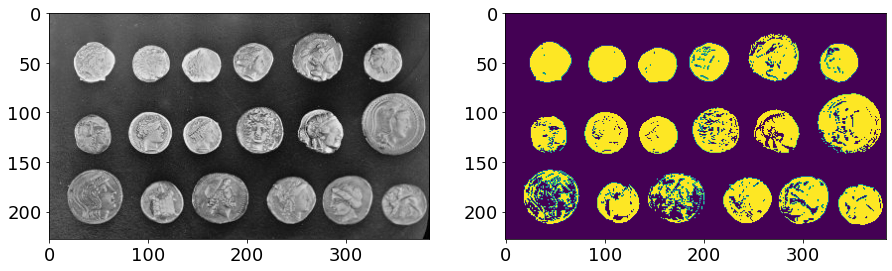

In [4]:
coins = data.coins()
coins = coins[75:, :]
plt.rcParams['font.size']=18
plt.figure(figsize= (15, 10))
plt.subplot(121)
plt.imshow(coins, cmap= 'gray')
plt.subplot(122)
segCoins = coins > 130
plt.imshow(segCoins)

Segmentácia obrazu prahovaním znamená, že si určím istý prah a určím si podmienku. Ak pixely v obrázku majú vyššiu hodnotu ako daný prah tak sa zobrazia, ak nižšiu tak nie.

Text(0, 0.5, 'Pixel count ')

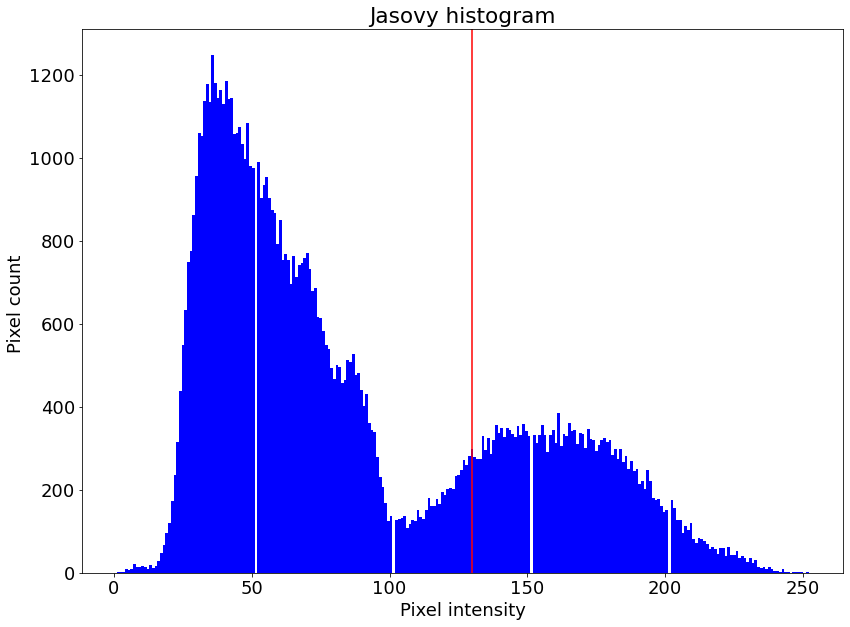

In [5]:
plt.figure(figsize= (30, 10))

ax1 = plt.subplot(121)
plt.hist(coins.ravel(), bins= 256, histtype= 'bar', color= 'blue')
ax1.axvline(130, color= 'r')
plt.title("Jasovy histogram")
plt.xlabel("Pixel intensity")
plt.ylabel("Pixel count ")

Converged to optimal threshold in 3 iteration with threshold: 108.13560341311842


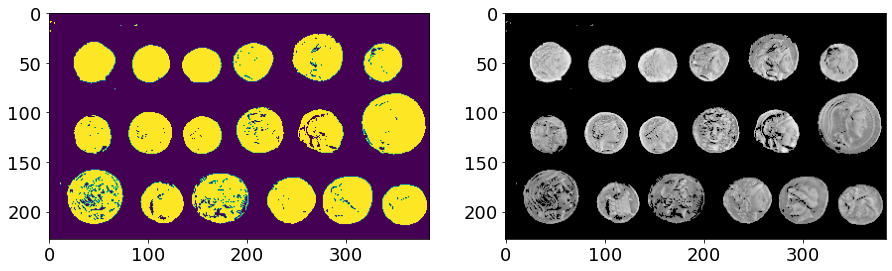

In [6]:
meanObjectIntensity = np.mean(coins[segCoins])
meanBackgroundIntensity = np.mean(coins[segCoins == 0])
trshld = (meanObjectIntensity + meanBackgroundIntensity) / 2
counter = 0

while True:
    background = coins < trshld
    obj = coins >= trshld
    meanObjectIntensity = np.mean(coins[obj])
    meanBackgroundIntensity = np.mean(coins[background])
    newTrshld = (meanObjectIntensity + meanBackgroundIntensity) / 2

    if np.abs(trshld - newTrshld) < 0.1:
        break
    counter = counter + 1
    trshld = newTrshld
print("Converged to optimal threshold in {} iteration with threshold: {}".format(counter, trshld))

plt.figure(figsize= (15, 10))
plt.subplot(121)
plt.imshow(coins > trshld)
plt.subplot(122)
plt.imshow(coins * (coins > trshld), cmap= 'gray')

Nerovnormerne osvetlenie

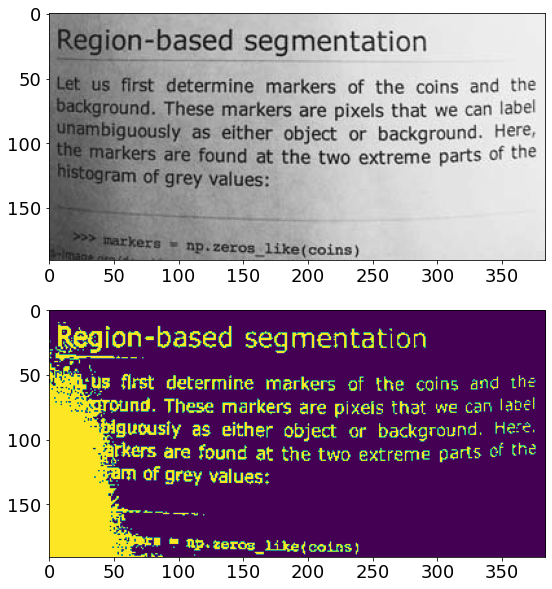

In [7]:
page = data.page()
plt.rcParams['font.size']=18
plt.figure(figsize= (15, 10))
plt.subplot(211)
plt.imshow(page, cmap= 'gray')
plt.subplot(212)
plt.imshow(page < 120)

Pri nerovnomernom osvetleni sa nemôzeme spoliehat len na jednoduchu segmentaciu, nakolko cast obrazu bude väcsinou nezrozumitelna, ako vidiet na obrazku vyssie. 
Ak by sme prahovali pod nejaku nizsiu hodnotu tak pixely s vysokou hodnotu by sme uz nevideli, napriklad pismena na pravej strane na obrazku. Kedze su viac osvetlene
nemusia byt viditelne ak zvolime nizsi prah pre pismena v tieni.

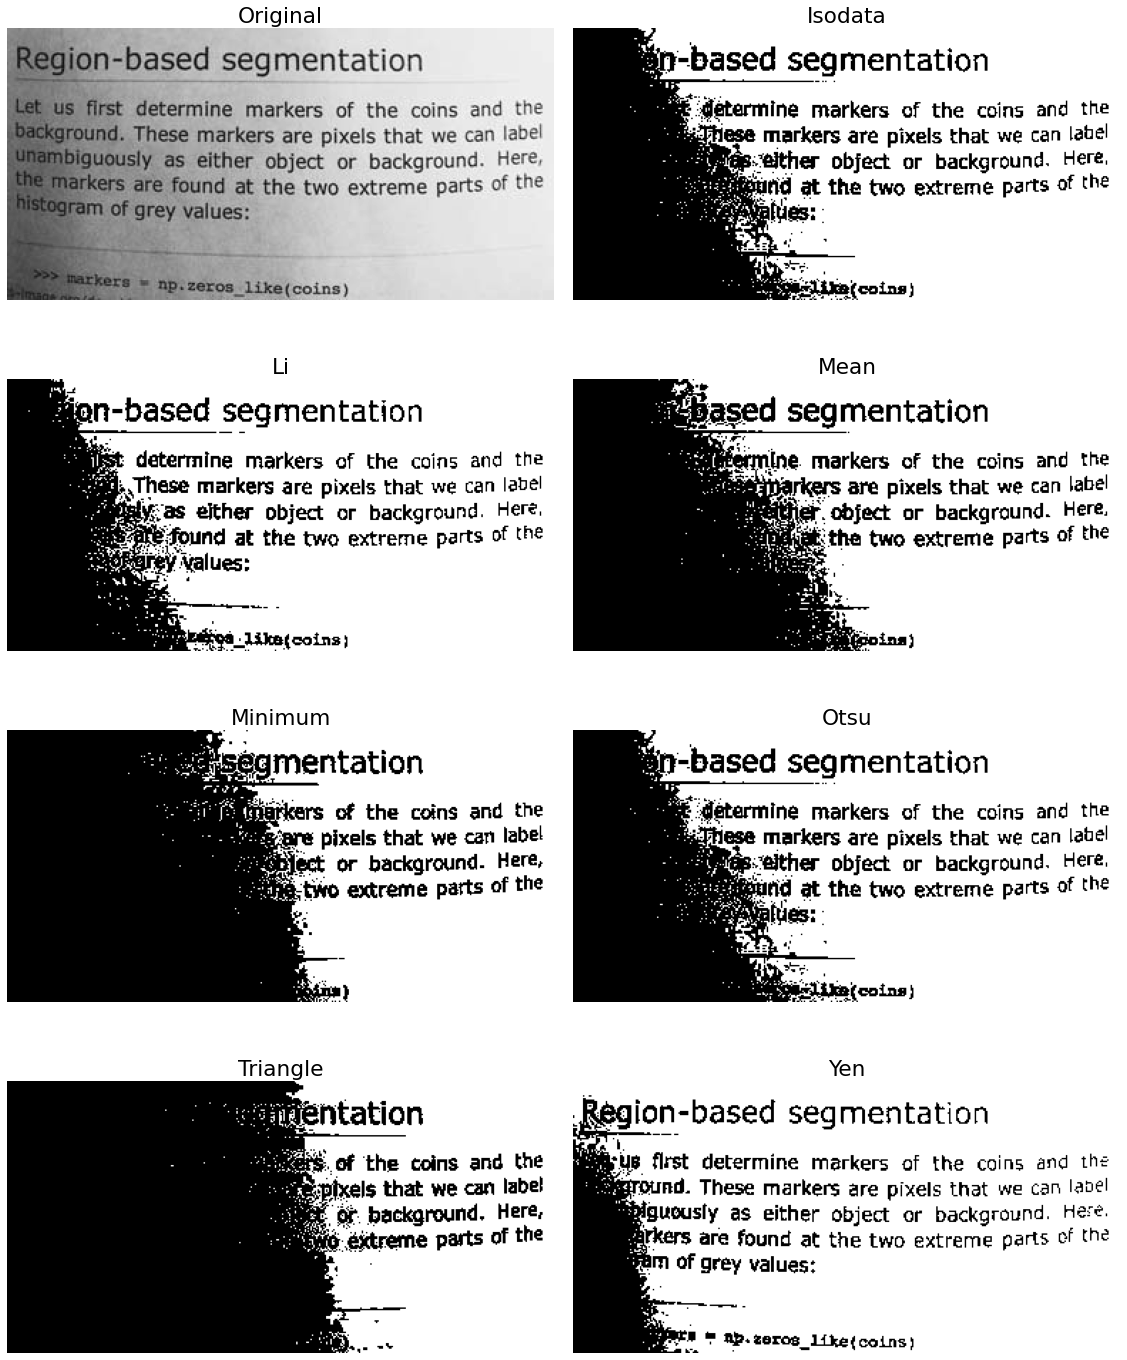

In [8]:
fig, ax = filters.try_all_threshold(page, figsize= (16, 20), verbose= False)
plt.rcParams['font.size']=18
plt.show()

Rychly prehlad roznych segmentacnych algoritmov, ktore su dostupne v SKimage.

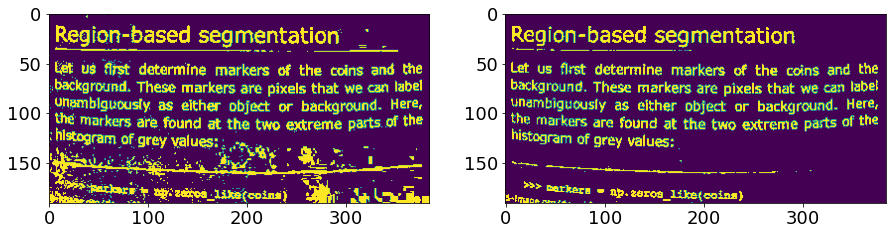

In [22]:
sElem = disk(20)
pageFloat = page / 255
pageFilt  = filters.rank.mean(pageFloat, selem= sElem) / 255

pageT1 = (pageFloat - pageFilt) < 0.0
pageT2 = (pageFloat - pageFilt) < -0.05
plt.figure(figsize= (15, 10))
plt.rcParams['font.size']=18
plt.subplot(121)
plt.imshow(pageT1)
plt.subplot(122)
plt.imshow(pageT2)

# Segmentacia farebneho obrazu 

RGB obraz

Text(0.5, 1.0, 'B')

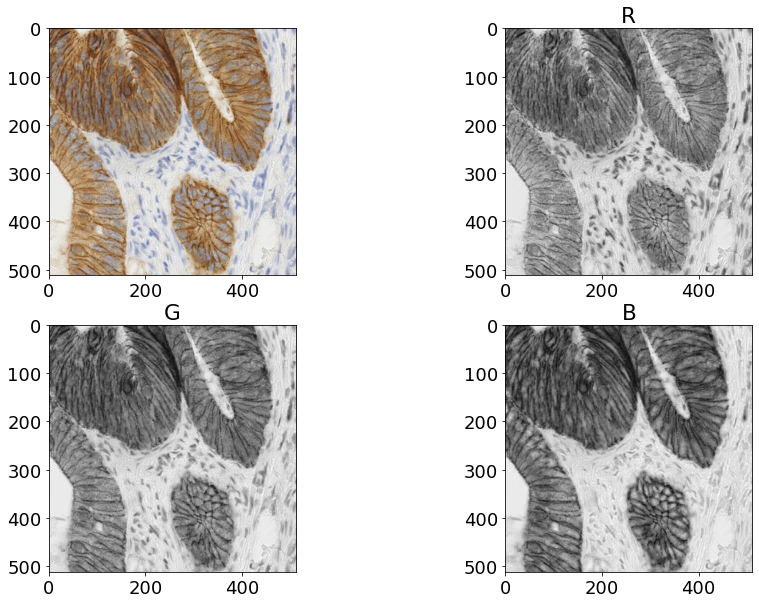

In [31]:
bunky = data.immunohistochemistry()
plt.figure(figsize= (15, 10))
plt.rcParams['font.size']=18
plt.subplot(221)
plt.imshow(bunky)
plt.subplot(222)
plt.imshow(bunky[:,:,0], cmap= 'gray')
plt.title('R')
plt.subplot(223)
plt.imshow(bunky[:,:,1], cmap= 'gray')
plt.title('G')
plt.subplot(224)
plt.imshow(bunky[:,:,2], cmap= 'gray')
plt.title('B')

Obrazok sme si rozdelili na tri samostatne kanaly RGB a previedli ich do sedotonovej mapy.

Text(0.5, 1.0, 'Result mask')

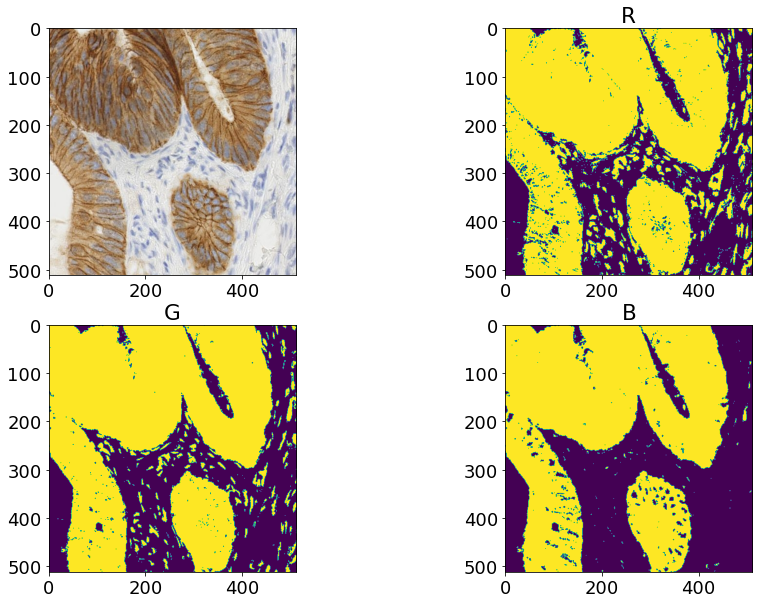

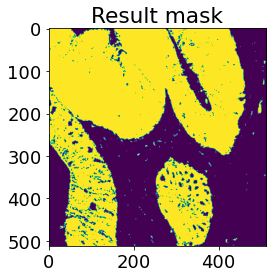

In [12]:
plt.figure(figsize= (15, 10))
plt.rcParams['font.size']=18
plt.subplot(221)
plt.imshow(bunky)

plt.subplot(222)
bunkyR = bunky[:,:,0] < 200
plt.imshow(bunkyR)
plt.title('R')

plt.subplot(223)
bunkyG = bunky[:,:,1] < 185
plt.imshow(bunkyG)
plt.title('G')

plt.subplot(224)
bunkyB = bunky[:,:,2] < 160
plt.imshow(bunkyB)
plt.title('B')

plt.figure()
mask = np.logical_and(np.logical_and(bunkyR, bunkyG), bunkyB)
plt.imshow(mask)
plt.title('Result mask')

Pre kazdy kanal sme si urcili prah, ktory chceme zobrazit a pomocou np.logical_and sme zo samostatnych kanalov dostali vyslednu masku.

In [ ]:
LAB obraz

Text(0.5, 1.0, 'b')

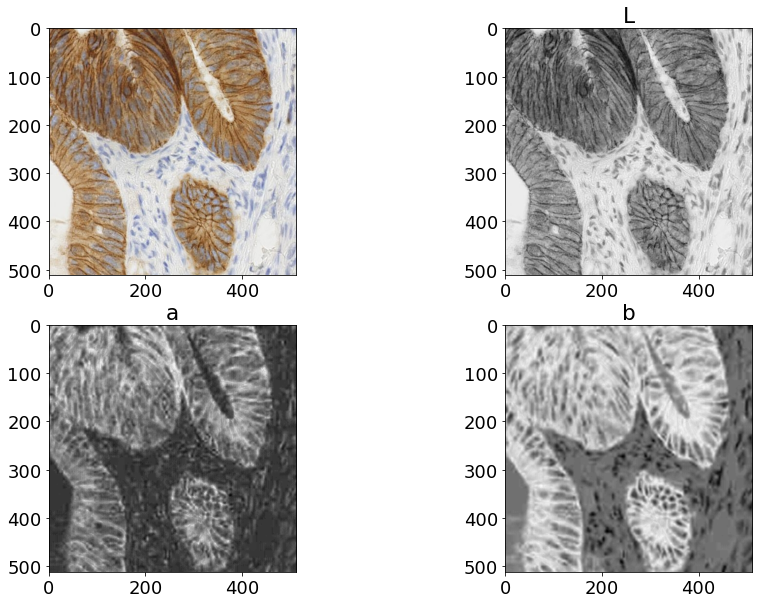

In [25]:

bunkyLab = color.rgb2lab(bunky)
plt.figure(figsize= (15, 10))
plt.rcParams['font.size']=18
plt.subplot(221)
plt.imshow(bunky)
plt.subplot(222)
plt.imshow(bunkyLab[:,:,0], cmap= 'gray')
plt.title('L')
plt.subplot(223)
plt.imshow(bunkyLab[:,:,1], cmap= 'gray')
plt.title('a')
plt.subplot(224)
plt.imshow(bunkyLab[:,:,2], cmap= 'gray')
plt.title('b')

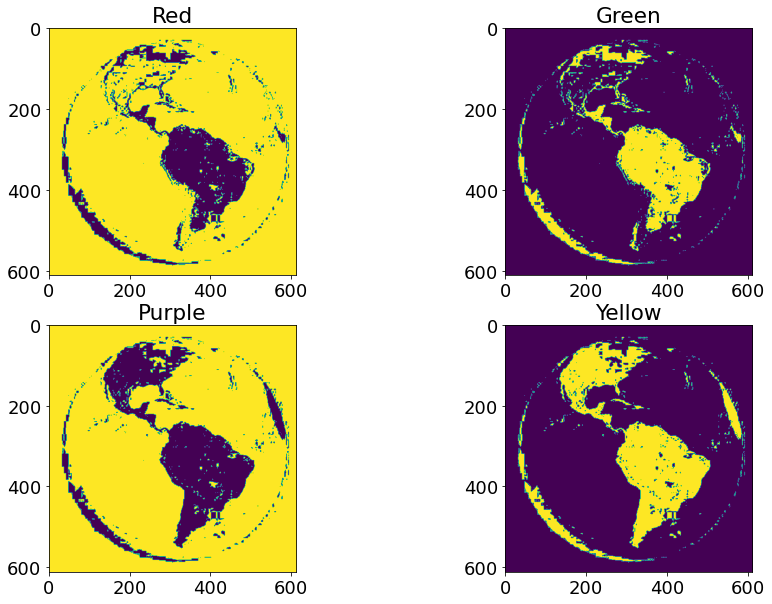

In [32]:
picture = plt.imread('./imgs/earth.jpg')
picture = color.rgb2lab(picture)
picRGB = np.uint8(plt.imread('./imgs/earth.jpg')*255)

red = np.logical_and(picture[:, :, 1] > 0, picture[:, :, 1] < 100)
green = np.logical_and(picture[:, :, 1] > -100, picture[:, :, 1] < 0)
blue = np.logical_and(picture[:, :, 2] > -100, picture[:, :, 2] < 0)
yellow = np.logical_and(picture[:, :, 2] > 0, picture[:, :, 2] < 100)

plt.rcParams['font.size']=18
plt.figure(figsize= (15, 10))
plt.subplot(221)
plt.title('Red')
plt.imshow(red)
plt.subplot(222)
plt.title('Green')
plt.imshow(green)
plt.subplot(223)
plt.title('Purple')
purple = np.logical_and(red, blue)
plt.imshow(purple)
plt.subplot(224)
plt.title('Yellow')
plt.imshow(yellow)